In [46]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

In [17]:
data = pd.read_csv("../Data Science/hr.csv")
data.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [18]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [19]:
data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<IPython.core.display.Javascript object>


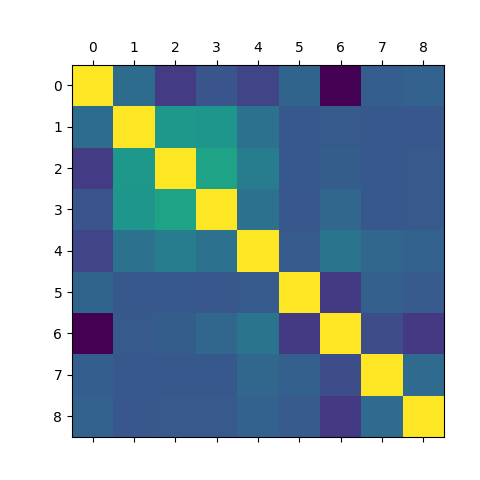

In [29]:
plt.matshow(data.corr())

In [21]:
data.drop("sales", axis=1, inplace=True)
data.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,low
1,0.80,0.86,5,262,6,0,1,0,medium
2,0.11,0.88,7,272,4,0,1,0,medium
3,0.72,0.87,5,223,5,0,1,0,low
4,0.37,0.52,2,159,3,0,1,0,low
5,0.41,0.50,2,153,3,0,1,0,low
6,0.10,0.77,6,247,4,0,1,0,low
7,0.92,0.85,5,259,5,0,1,0,low
8,0.89,1.00,5,224,5,0,1,0,low
9,0.42,0.53,2,142,3,0,1,0,low


In [22]:
data['salary'] = pd.factorize(data['salary'])[0] + 1
data.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,1
1,0.80,0.86,5,262,6,0,1,0,2
2,0.11,0.88,7,272,4,0,1,0,2
3,0.72,0.87,5,223,5,0,1,0,1
4,0.37,0.52,2,159,3,0,1,0,1
5,0.41,0.50,2,153,3,0,1,0,1
6,0.10,0.77,6,247,4,0,1,0,1
7,0.92,0.85,5,259,5,0,1,0,1
8,0.89,1.00,5,224,5,0,1,0,1
9,0.42,0.53,2,142,3,0,1,0,1


In [23]:
y = data['left']
x = data.drop("left", axis=1)

# # K - Nearest Neightbor (3 Neightbor)

In [63]:
clf = KNeighborsClassifier(n_neighbors=3)
knn = clf.fit(x, y)
print("Accuracy Score: " + str(knn.score(x, y)))

Accuracy Score: 0.978398559904


In [64]:
cv = cross_val_score(knn, x, y, cv=10)
cv

array([ 0.96269154,  0.95533333,  0.94133333,  0.944     ,  0.93933333,
        0.94933333,  0.964     ,  0.958     ,  0.97331554,  0.96931288])

<IPython.core.display.Javascript object>


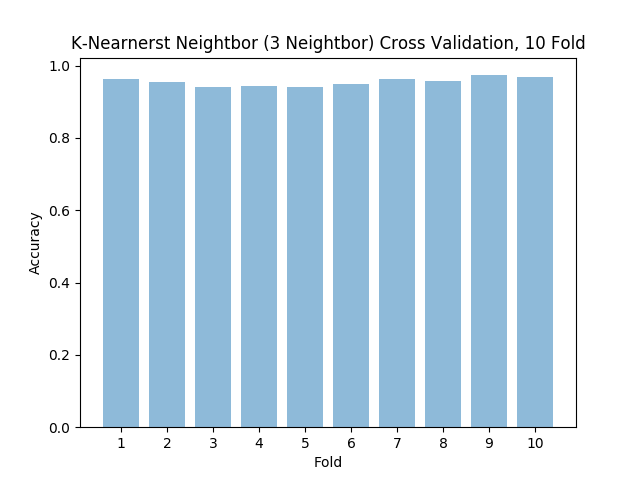

In [65]:
objects = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
y_pos = np.arange(len(objects))
performance = cv
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.title('K-Nearnerst Neightbor (3 Neightbor) Cross Validation, 10 Fold')
 
plt.show()

In [66]:
cva = np.array(cv)
mean = np.mean(cva)
std = np.std(cva)
print("Mean: " + str(mean))
print("Standard Deviation: " + str(std))

Mean: 0.955665329125
Standard Deviation: 0.0112716242245


## Parameter Tuning (1 - 20) Neightbors

In [67]:
k = np.arange(20)+1
parameters = {'n_neighbors': k}
clf = GridSearchCV(knn,parameters,cv=10)
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.33,random_state=42)
clf.fit(X_train,Y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [68]:
clf.best_score_

0.96079211861876801

In [69]:
clf.best_estimator_.n_neighbors

1